In [ ]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

In [ ]:
L = 1.0
nx =51
dx = L/(nx-1)
alpha = 1.22e-3
x = numpy.linspace(0.0,L,num=nx)
T0 = numpy.zeros(nx)
T0[0]=100.0

In [ ]:
def ftcs(T0,nt,dt,dx,alpha):
    T = T0.copy()
    sigma = alpha*dt/dx**2
    for n in range (nt):
        T[1:-1] = T[1:-1]+sigma * (T[:-2]-2*T[1:-1]+T[2:])
        T[0]=100
        T[-1]=0.0
    return T


In [ ]:
nt = 100
sigma = 0.6
dt=sigma * dx**2/alpha
T = ftcs (T0,nt,dt,dx,alpha)

In [ ]:
pyplot.plot(x,T,lw=3)

In [ ]:
def ftcs_mixed_bcs(T0,nt,dt,dx,alpha):
    T=T0.copy()
    sigma = alpha *dt/dx**2
    for n in range (nt):
        T[1:-1] = T[1:-1]+sigma * (T[:-2]-2*T[1:-1]+T[2:])
        T[-1]=T[-2]
    return T

In [ ]:
nt = 100
sigma = 0.5
dt=sigma * dx**2/alpha
T = ftcs (T0,nt,dt,dx,alpha)
pyplot.plot(x,T,lw=3)

In [ ]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16
L = 1.0
nx =51
dx = L/(nx-1)
alpha = 1.22e-3
q=0.0
x = numpy.linspace(0.0,L,num=nx)
T0 = numpy.zeros_like(x)
T0[0]=100.0

In [ ]:
from scipy import linalg
def lhs_operator(nx,sigma):
    D = numpy.diag((2+1/sigma)*numpy.ones(nx-2))
    D[-1,-1] = 1+1/sigma
    U = numpy.diag(-1.0*numpy.ones(nx-3),k=1)
    L = numpy.diag(-1.0*numpy.ones(nx-3),k=-1)
    A = D+U+L
    return A

In [ ]:
def rhs_vector(T,sigma,q,dx):
    b = T[1:-1]/sigma
    b[0] += T[0]
    b[-1] += q*dx
    return b

In [ ]:
def btcs(T0,nt,dt,dx,alpha,q):
    sigma = alpha *dt/dx**2
    A = lhs_operator(nx,sigma)
    T = T0.copy
    for n in range (nt):
        b = rhs_vector(T,sigma,q,dx)
        T[1:-1]= linalg.solve(A,b)
        T[-1]=T[-2]+q*dx
    return T

In [ ]:
nt = 1000
sigma = 5.0
t=sigma * dx**2/alpha
T = btcs (T0,nt,dt,dx,alpha,q)
pyplot.plot(x,T)

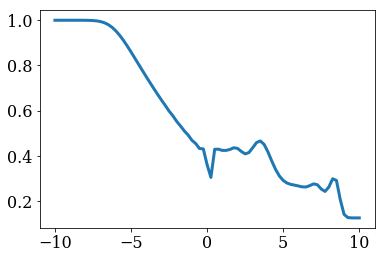

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

nx = 81
L = 20
dx = L/(nx-1)
t = 0.01
dt = 0.0002
gamma = 1.4
x = numpy.linspace(-10,10,num=nx)
nt = int(t/dt)+1

rho_0 = numpy.ones_like(x)*0.125
mask = numpy.where(x<0.0)
rho_0[mask]=1

v_0 = numpy.zeros_like(x)

p_0 = numpy.ones_like(x)*10000
mask = numpy.where (x<0.0)
p_0[mask] = 100000

v = v_0.copy()
p = p_0.copy()
rho = rho_0.copy()



eT = numpy.ones(nx)
eT = p/((gamma-1)*rho)+0.5*v**2


u = numpy.ones((3,nx))
u[0,]=rho
u[1,]=rho * v
u[2,]=rho * eT

un     = numpy.zeros_like(u)
u_star = numpy.zeros_like(u)
f_star = numpy.zeros_like(u)
f      = numpy.zeros_like(u)

for n in range (81):
    un = u.copy()
    u1 = u[0,]
    u2 = u[1,]
    u3 = u[2,]
    f[0,] = u2
    f[1,] = u2**2/u1+(gamma-1)*(u3-0.5*(u2**2/u1))
    f[2,] =(u3+(gamma-1)*(u3-0.5*(u2**2/u1)))*u2/u1
    u_star[:,:-1] = 0.5*(un[:,1:]+un[:,:-1])-dt/(2*dx)*(f[:,1:]-f[:,:-1])
    u_star[:,-1] = u[:,-1]
    u1 = u_star[0,]
    u2 = u_star[1,]
    u3 = u_star[2,]
    f_star[0,] = u2
    f_star[1,] = u2**2/u1+(gamma-1)*(u3-0.5*(u2**2/u1))
    f_star[2,] = (u3+(gamma-1)*(u3-0.5*(u2**2/u1)))*u2/u1
    u[:,1:-1]  = un[:,1:-1] - dt/dx*(f_star[:,1:-1]-f_star[:,:-2])

pyplot.plot(x,u[0,:],lw=3)


In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family']='serif'
pyplot.rcParams['font.size']=16

nx = 81
L = 20
dx = L/(nx-1)
t = 0.01
dt = 0.0002
gamma = 1.4
x = numpy.linspace(-10,10,num=nx)
nt = int(t/dt)+1

rho_0 = numpy.ones(nx)*0.125
mask = numpy.where(x<=0.0)
rho_0[mask]=1

u_0 = numpy.zeros(nx)

p_0 = numpy.ones(nx)*10
mask = numpy.where (x<=0.0)
p_0[mask] = 100

u = u_0.copy()
p = p_0.copy()
rho = rho_0.copy()

u1 = numpy.ones(nx)
u2 = numpy.ones(nx)
u3 = numpy.ones(nx)
e = numpy.ones(nx)
e = p/(gamma-1)/rho
eT = numpy.ones(nx)
eT = e+u*u/2

u1 = rho 
u2 = rho * u
u3 = rho*eT
u1_star = u1.copy()
u2_star = u2.copy()
u3_star = u3.copy()
f1_star =numpy.ones(nx)
f2_star =numpy.ones(nx)
f3_star =numpy.ones(nx)
f1=numpy.zeros(nx)
f2=numpy.zeros(nx)
f3=numpy.zeros(nx)

e = p/(gamma-1)/rho
eT = numpy.ones(nx)
eT = e+(u**2/2)

u1 = rho 
u2 = rho * u
u3 = rho * eT

pyplot.plot (x,u1)
for n in range (nt):
    u1_rhs = u1.copy()
    u2_rhs = u2.copy()
    u3_rhs = u3.copy()
    f1 = u2_rhs
    f2 = u2_rhs**2/u1_rhs+(gamma-1)*(u3_rhs-0.5*u2_rhs**2/u1_rhs)
    f3 = (u3_rhs+(gamma-1)*(u3_rhs-0.5*u2_rhs**2/u1_rhs))*u2_rhs/u1_rhs
    for i in range (1,nx-1):
        
            f1[i] = u2_rhs[i]
            f2[i] = u2_rhs[i]**2/u1_rhs[i]+(gamma-1)*(u3_rhs[i]-0.5*u2_rhs[i]**2/u1_rhs[i])
            f3[i] = (u3_rhs[i]+(gamma-1)*(u3_rhs[i]-0.5*(u2_rhs[i]**2/u1_rhs[i])))*u2_rhs[i]/u1_rhs[i]
        
            u1_star[i] = 0.5*(u1_rhs[i+1]+u1_rhs[i])-0.5*dt/dx*(f1[i+1]-f1[i])
            u2_star[i] = 0.5*(u2_rhs[i+1]+u2_rhs[i])-0.5*dt/dx*(f2[i+1]-f2[i])
            u3_star[i] = 0.5*(u3_rhs[i+1]+u3_rhs[i])-0.5*dt/dx*(f3[i+1]-f3[i])
            u1_star[-1] = u1[-1]
            u2_star[-1] = u2[-1]
            u3_star[-1] = u3[-1]
        
            f1_star[i] = u2_star[i]
            f2_star[i] = u2_star[i]**2/u1_star[i]+(gamma-1)*(u3_star[i]-0.5*u2_star[i]**2/u1_star[i])
            f3_star[i] = (u3_star[i]+(gamma-1)*(u3_star[i]-0.5*u2_star[i]**2/u1_star[i]))*u2_star[i]/u1_star[i]
        
            u1[i] = u1_rhs[i] - dt/dx*(f1_star[i]-f1_star[i-1])
            u2[i] = u2_rhs[i] - dt/dx*(f2_star[i]-f2_star[i-1])
            u3[i] = u3_rhs[i] - dt/dx*(f3_star[i]-f3_star[i-1])

pyplot.plot(x,u1)

    u_star[:,:-1] = 0.5*(un[:,1:]+un[:,:-1])-dt/(2*dx)*(f[:,1:]-f[:,:-1])
    u_star[:,-1] = u[:,-1]
    u1 = u_star[0,]
    u2 = u_star[1,]
    u3 = u_star[2,]
    f_star[0,] = u2
    f_star[1,] = u2**2/u1+(gamma-1)*(u3-0.5*(u2**2/u1))
    f_star[2,] = (u3+(gamma-1)*(u3-0.5*(u2**2/u1)))*u2/u1
    u[:,1:-1]  = un[:,1:-1] - dt/dx*(f_star[:,1:-1]-f_star[:,:-2])

IndentationError: unexpected indent (<ipython-input-3-06099b532c46>, line 90)